# load useful libraries

In [3]:
import scanpy as sc

from warnings import filterwarnings
filterwarnings('ignore')

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.4.4 scikit-learn==1.2.0 statsmodels==0.13.5 pynndescent==0.5.8


# read data

In [4]:
adata = sc.read_h5ad('./sc_training.h5ad')
adata

AnnData object with n_obs × n_vars = 28697 × 15077
    obs: 'gRNA_maxID', 'state', 'condition', 'lane'
    layers: 'rawcounts'

In [ ]:
unique_conds = adata.obs["condition"].unique()

In [ ]:
adata.obs["state"].unique()

In [ ]:
counts = [sum(adata.obs["condition"] == cond) for cond in list(unique_conds)]

In [ ]:
condata = list(adata[adata.obs["condition"] == 'Unperturbed'].copy())

In [54]:
condata[0].obs["state"]

053l1_AAACCTGAGATGTCGG-1    terminal exhausted
Name: state, dtype: category
Categories (1, object): ['terminal exhausted']

In [55]:
effe = sum([condata[i].obs["state"][0] == "effector" for i in range(len(condata))])/total

In [56]:
effe

0.20972278023302532

In [15]:
condata = map(lambda x: x.obs, condata)

In [17]:
condata = list(condata)

In [38]:
import pandas as pd

In [72]:
 pd.concat([proplist,pd.DataFrame([[cond,prog,effe,cycl,term,othe]])], axis=0)

,condition,progenitor,effector,cycling,terminal exhausted,other,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN,Rps6,1.0,0.0,0.0,0.0,0.0


In [91]:
{a: len(b) for (a,b) in condata.groupby("state")}

{'cycling': 1952,
 'effector': 1044,
 'other': 86,
 'progenitor': 336,
 'terminal exhausted': 1560}

In [86]:
list(map(lambda d: len(d[1]), condata.groupby("state")))

[1952, 1044, 86, 336, 1560]

In [98]:
pd.concat([pd.DataFrame(row),pd.Series(row)])

ValueError: If using all scalar values, you must pass an index

In [92]:
proplist = pd.DataFrame(columns=["total", "condition","progenitor","effector","cycling","terminal exhausted", "other"])
adata_df = adata.obs.copy()

for cond in list(unique_conds):
    print(cond)
    condata = adata_df[adata.obs["condition"] == cond]
    total = len(condata)
    row = {a: len(b) for (a,b) in condata.groupby("state")}
    row["condition"] = cond
    row["total"] = total
    tmp = pd.DataFrame(row, columns=["total", "condition","progenitor","effector","cycling","terminal exhausted", "other"])
    proplist = pd.concat([proplist, tmp])

Unperturbed


ValueError: If using all scalar values, you must pass an index

In [62]:
proplist

,condition,progenitor,effector,cycling,terminal exhausted,other


In [74]:
len(counts)

67

In [54]:
import matplotlib.pyplot as plt

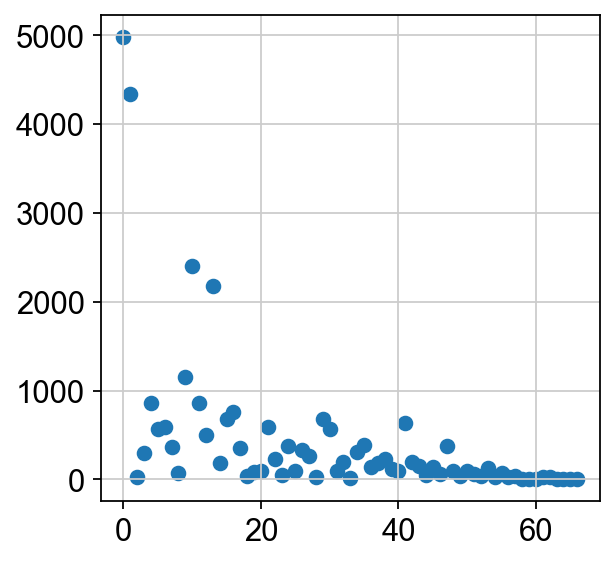

In [55]:
plt.scatter(list(range(67)), counts)

# adata.X stores the stadard-normalized data, but you can also reconstruct it using adata.layers['rawcounts']

In [4]:
# make a copy of normalized logcounts
adata.layers['normalized_logcounts'] = adata.X.copy()

In [5]:
# standard normalization
adata.X = adata.layers['rawcounts'].copy()

sc.pp.normalize_total(adata, target_sum=5e3)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


# visualize cell state clusters on umap

In [6]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)
sc.tl.umap(adata, min_dist=0.3) 

computing PCA
    with n_comps=50
    finished (0:00:46)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)


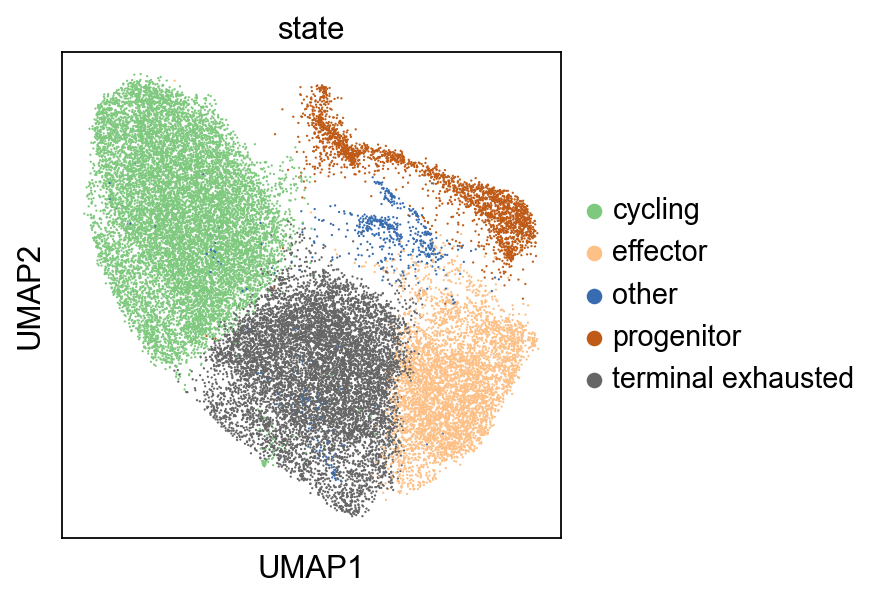

In [7]:
sc.pl.umap(adata, color=['state'], palette='Accent', legend_loc='right margin')

In [9]:
adata.X[]

<28697x15077 sparse matrix of type '<class 'numpy.float32'>'
	with 80497219 stored elements in Compressed Sparse Row format>

In [8]:
!pip install umap-learn

  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached pynndescent-0.5.8.tar.gz (1.1 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=7931598664dbcb467500366d8044aafdd5e965d645ea237bb5d1bbfc947ebb2e
  Stored in directory: /home/ziggy/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55496 sha256=e03214bde48feefff0247668fd0d0b7c5307cb542be7f9e09d3e663b7fcff67d
  Stored in directory: /home/ziggy/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [56]:
adata.X

<28697x15077 sparse matrix of type '<class 'numpy.float32'>'
	with 80497219 stored elements in Compressed Sparse Row format>

In [57]:
adata.obs

,gRNA_maxID,state,condition,lane
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1
053l1_AAACCTGAGTCGTTTG-1,Tox2-3,terminal exhausted,Tox2,lane1
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1
...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,Tox2-3,other,Tox2,lane4
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4
053l4_TTTGTCATCCTCGCAT-1,Zeb2-2,cycling,Zeb2,lane4
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4


In [60]:
adata.layers["rawcounts"]

<28697x15077 sparse matrix of type '<class 'numpy.float32'>'
	with 80497219 stored elements in Compressed Sparse Row format>

In [67]:
sum(adata.var_names == 'Bach2')

1

In [65]:
adata.var_names

Index(['Mrpl15', 'Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1', '4732440D04Rik',
       'Pcmtd1', 'Gm26901', 'Rrs1', 'Adhfe1',
       ...
       'Slc3a1', 'Cfap53', 'Pstpip2', 'Gm17227', 'Ms4a8a', '9130016M20Rik',
       'Htr7', 'Col17a1', 'Awat2', 'Amot'],
      dtype='object', length=15077)

In [68]:
adata

AnnData object with n_obs × n_vars = 28697 × 15077
    obs: 'gRNA_maxID', 'state', 'condition', 'lane'
    layers: 'rawcounts'